<a href="https://colab.research.google.com/github/AvinashTiwari/MachineLearning/blob/master/Training_Deep_Learning_Model_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow as tf
import numpy as np
import warnings
from zipfile import ZipFile
warnings.filterwarnings("ignore")
width = 224
height = 224
batch = 32
data_directory = "dataset"

In [5]:
with ZipFile("./face_mask_no_Mask_dataset.zip", 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.3,
                                                                    subset="training",
                                                                    seed=50,
                                                                    image_size=(height,width),
                                                                    batch_size=batch)


Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [8]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.3,
                                                                    subset="validation",
                                                                    seed=50,
                                                                    image_size=(height,width),
                                                                    batch_size=batch)


Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [9]:
training_data.class_names

['with_mask', 'without_mask']

In [10]:
classes = training_data.class_names
classes

['with_mask', 'without_mask']

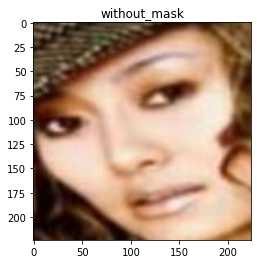

In [13]:
import matplotlib.pyplot as plt
for images , labels in training_data.take(1):
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.title(classes[labels[1]])